# Laboratorio 1 - Machine Learning Engineering
Gustavo González - 21438  
Eduardo Ramirez - 19946  
Diego Leiva - 21752  
Maria Marta Ramirez - 21342  


---

## Business Understanding

### Objetivos Comerciales
El objetivo principal del negocio es reducir los retrasos en la entrega de productos, ya que esto afecta directamente la satisfacción del cliente, la reputación de la empresa y los costos logísticos.

Se busca:
* Identificar patrones y causas comunes de entregas tardías.
* Predecir qué pedidos tienen alta probabilidad de no llegar a tiempo.
* Tomar decisiones proactivas (como cambiar el método de envío o priorizar pedidos críticos).

###  Inventario de recursos

Datos:
* Acceso completo al dataset de pedidos históricos con 10,999 registros y 12 variables.
* Posibilidad de actualización mensual del dataset con nuevos pedidos.
* Conocimiento parcial de la calidad de los datos (posibles inconsistencias que deben explorarse).

Tecnología:
* Computadoras personales con Python y librerías como Pandas, Scikit-learn, Matplotlib.
* Acceso a herramientas de visualización como Power BI o Google Sheets.
* Posibilidad de usar notebooks colaborativos (Google Colab, Jupyter).

### Objetivos técnicos

* Clasificación binaria: construir un modelo de machine learning que prediga si un pedido llegará a tiempo o no (Reached on time: 0/1). 
* Evaluar el modelo con métricas como accuracy, F1 score, matriz de confusión, ROC-AUC.
* Identificar las variables más relevantes que influyen en los retrasos (feature importance).
* Construir visualizaciones que permitan al equipo de negocio entender los factores de riesgo.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/Train 2.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## Descripción de datos

## Exploratory Data Analisys

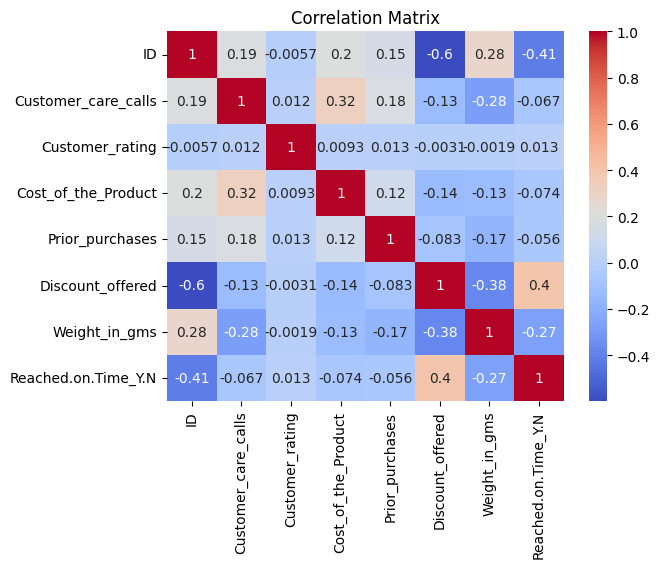

In [4]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Distribution of Numerical Columns

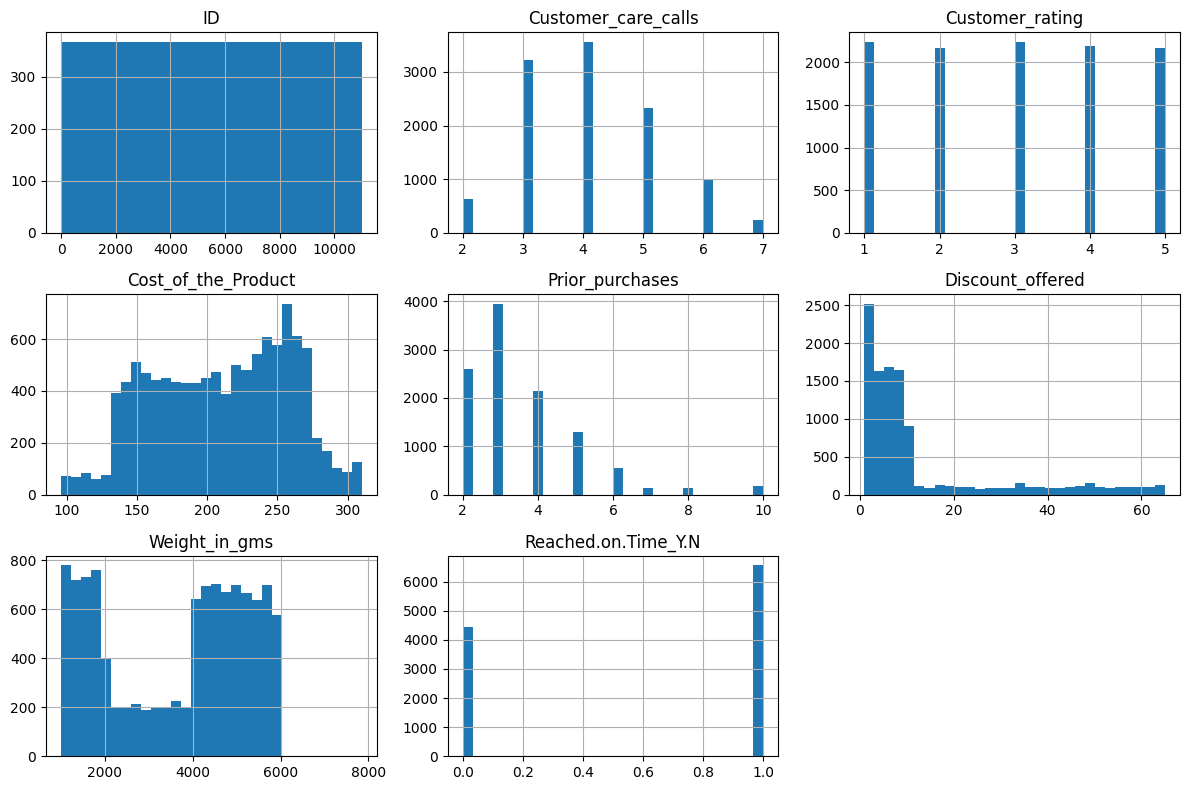

In [8]:
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

## Number of Unique Values on Non-Numerical Columns

In [5]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Warehouse_block: 5 unique values
Mode_of_Shipment: 3 unique values
Product_importance: 3 unique values
Gender: 2 unique values


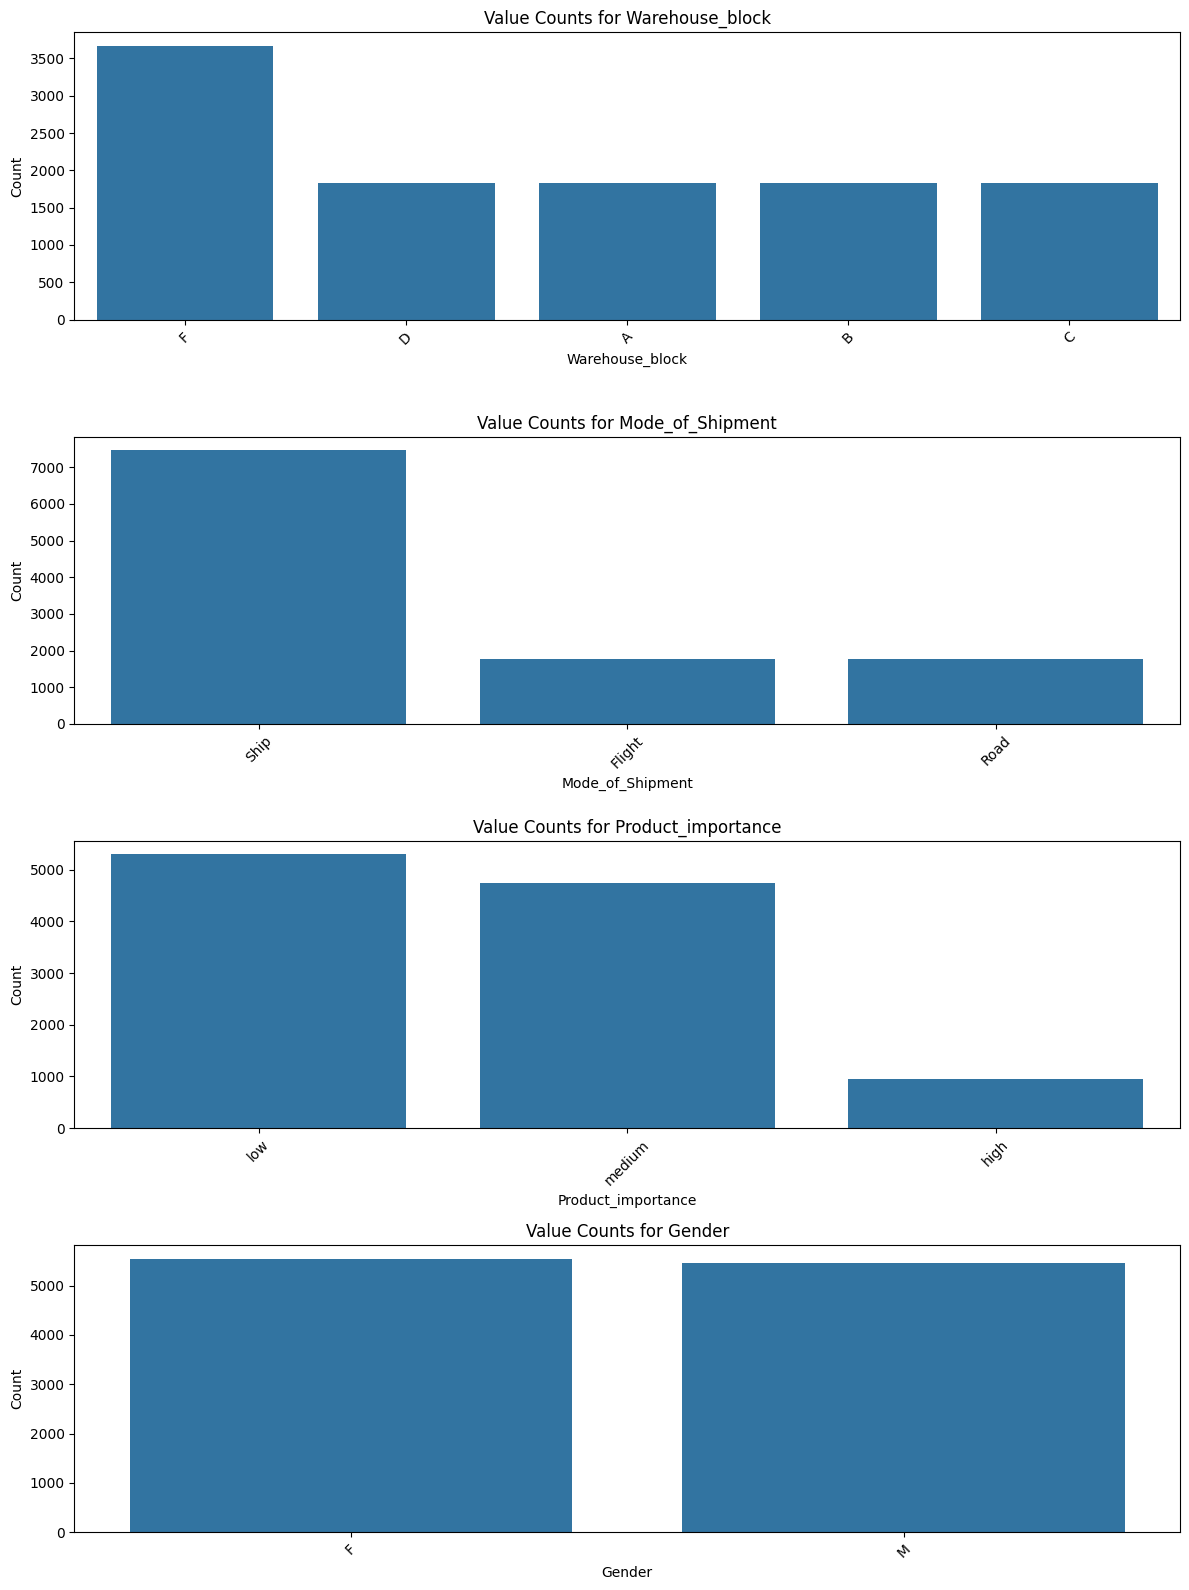

In [10]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
n_cols = len(non_numeric_cols)
fig, axes = plt.subplots(n_cols, 1, figsize=(12, 4 * n_cols))

for i, col in enumerate(non_numeric_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Value Counts for {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Null Counts

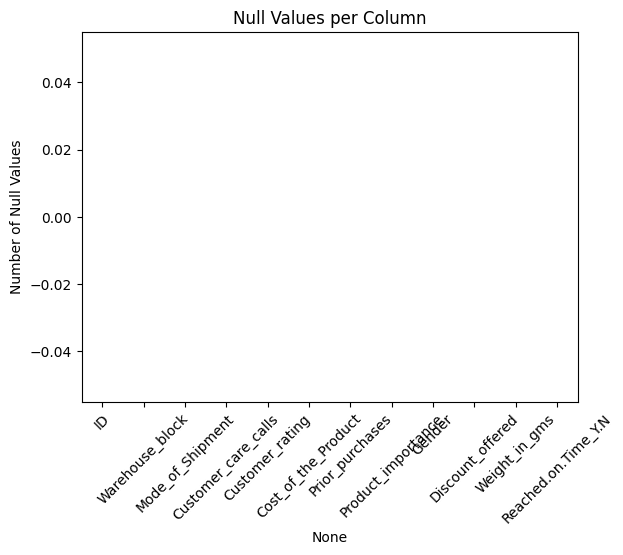

In [6]:
null_counts = df.isnull().sum()
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=45)
plt.ylabel("Number of Null Values")
plt.title("Null Values per Column")
plt.show()

In [7]:
null_counts = df.isnull().sum()
print(null_counts)

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


### Informe
## Datos iniciales y complementarios

El dataset utilizado cuenta con 10,999 registros y 12 columnas. Los datos provienen de pedidos históricos y están enfocados en identificar qué factores influyen en que un pedido llegue o no a tiempo. Las variables incluidas son tanto numéricas como categóricas y se detallan a continuación:
* ID: Identificador único del pedido.  
* Warehouse_block: Letra del bloque de almacén (5 valores únicos).  
* Mode_of_Shipment: Método de envío (Flight, Ship, Road).  
* Customer_care_calls: Número de llamadas del cliente al servicio.  
* Customer_rating: Calificación del cliente (del 1 al 5).  
* Cost_of_the_Product: Costo del producto.  
* Prior_purchases: Número de compras anteriores.  
* Product_importance: Importancia del producto (low, medium, high).  
* Gender: Género del cliente (Male, Female).  
* Discount_offered: Descuento ofrecido en el pedido.  
* Weight_in_gms: Peso del producto en gramos.  
* Reached.on.Time_Y.N: Variable objetivo (1 si llegó a tiempo, 0 si no).  

## Datos que podrían complementar el análisis

Aunque el dataset tiene buena cobertura, algunos datos adicionales podrían ayudar a mejorar tanto el análisis como la predicción:
* Fechas de envío y entrega: Para calcular con más precisión los tiempos de entrega y detectar patrones temporales.  
* Ubicación del cliente o distancia al almacén: Información útil para entender la logística.  
* Tipo o categoría de producto: Algunos productos pueden tener diferentes prioridades o requerimientos de envío.  
* Carga del almacén: Saber cuántos pedidos maneja cada bloque podría explicar demoras.  
* Tiempo estimado de entrega (ETA): Para comparar con el tiempo real y detectar desviaciones.  


## Descripción de los Datos

Se analizaron tanto las variables numéricas como las categóricas.

### Variables categóricas
* Warehouse_block: 5 bloques diferentes.  
* Mode_of_Shipment: 3 tipos de transporte.  
* Product_importance: baja, media y alta.  
* Gender: masculino y femenino.  

Se hizo un análisis de frecuencias para estas variables, y se graficaron los conteos para entender la distribución de valores. Esto ayuda a identificar si hay alguna categoría dominante que pueda influir en los resultados del modelo.

### Variables numéricas

Se evaluaron variables como Customer_rating, Cost_of_the_Product, Weight_in_gms, etc., usando histogramas para ver su distribución, y una matriz de correlación para entender la relación entre ellas. Algunas variables tienen correlaciones leves entre sí, pero ninguna relación extrema que sugiera duplicidad o multicolinealidad inmediata.

## Calidad de datos

A simple vista, los datos se ven limpios: no hay valores nulos, las columnas están bien tipificadas, y las distribuciones no muestran errores evidentes. Sin embargo, si analizamos la calidad desde un enfoque más práctico —es decir, si los datos realmente nos sirven para el objetivo que tenemos— la historia cambia un poco.

### Aspectos positivos
* No hay datos faltantes, lo cual facilita el procesamiento y evita imputaciones innecesarias.
* Los tipos de datos están bien estructurados, y no hay codificaciones incoherentes.
* Visualmente, los datos son consistentes.

### Aspectos negativos
El objetivo del proyecto es predecir si un pedido llegará a tiempo o no, y desde esta perspectiva, la mayoría de las variables no parecen aportar mucho valor predictivo:

* Variables como Gender, Prior_purchases, Discount_offered o incluso Customer_rating no tienen una relación clara con el tiempo de entrega.
* La matriz de correlación confirma que no hay correlaciones fuertes (ni siquiera moderadas) entre las variables numéricas y la variable objetivo (Reached.on.Time_Y.N).
* Algunas variables podrían tener una relación no lineal o más sutil, pero en este punto del análisis no hay evidencia clara de que sean útiles.


